# Задача 2. Сравнение методов классификации

* **Дедлайн**: 20.11.2022, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 9
* **Выполнил**: Хастиев Шамиль Ринатович
* **Группа**: 22.М08

## Задача

- [X] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [X] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [X] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [X] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [X] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [X] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [X] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [X] (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [X] (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

## Models
- [X] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [X] (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.

In [2]:
from numpy.core.fromnumeric import mean
from traitlets.config.application import ArgumentError
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from collections import Counter


class MLogisticRegrestion(BaseEstimator, ClassifierMixin):
    """
    Custom Logistic regression model, inherits sklearn estimator class, 
    works with most of sklearn features
    
    Parameters
    ----------
    lr : float
      learning rate of the model
    epochs : int
      number of epochs to train
    random_state : int
      fixes randomness
    Methods
    ----------
    fit(X, y):
      fits the model
    
    predict(X):
      inference
    
    step(X, y):
      culculates gradient

    update(w, b):
      updates the weigts 

    """
    def __init__( self, lr=0.1, epochs=100, random_state=None):      
        self.lr = lr   
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.w = np.random.randn(np.shape(X)[1], )
        self.b = 0
        for i in range(self.epochs):
            gradient, b = self.step(X, y)
            self.update(gradient, b)
    
    def step(self, X, y):
        err = np.reshape((self.predict(X, 0) - y.T), np.shape(X)[0])     
        return np.dot(X.T, err)/np.shape(X)[0], np.sum(err) / np.shape(X)[0]
    
    def update(self, w, b):
        self.w -= self.lr * w
        self.b -= self.lr * b 

    def predict(self, X, threshold=0.5):
        probs = 1/( 1 + np.exp( -( X.dot(self.w) + self.b)))  
        if threshold:
            probs[probs<threshold] = 0
            probs[probs>0] = 1
        return probs


class MKnn(BaseEstimator, ClassifierMixin):
    """
    Custom knn model, inherits sklearn estimator class, 
    works with most of sklearn features
    
    Parameters
    ----------
    k : int
      number of neighbors to check 
    weights : ['uniform', 'distance']
      how to choose the class
    distance : function
      function to calculate the distance between points
    random_state : int
      fixes randomness
    
    Methods
    ----------
    fit(X, y):
      fits the model
    
    predict(X):
      inference

    """
    def __init__( self, k=5,
                 weights='uniform',
                 distance=lambda a,b : np.linalg.norm(a-b),
                 random_state=None):         
        self.k=k
        self.random_state = random_state
        self.weights = weights
        self.distance = distance
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y = []
        for x in X:
            y.append(self.predict_for_point(x))
        return np.array(y)

    def predict_for_point(self, x):
        distances = self.get_distances(x)
        if self.weights=='distance':
            zero = []
            one = []
            for d in distances:
                if d[1] == 0:
                    zero.append(d[0])
                else:
                    one.append(d[0])
            if not len(zero):
                return 1
            if not len(one) or sum(zero) / len(zero) > sum(one) / len(one):
                return 0
            else: 
                return 1
        else :
            labels = [i[1] for i in distances]
            occurence_count = Counter(labels)
            return occurence_count.most_common(1)[0][0]


    def get_distances(self, x):
        distances = []
        for i, y in zip(self.X, self.y):
            distances.append((self.distance(x, i), y))
        return sorted(distances, key=lambda x: x[0])[:self.k]
    

## Data exploration
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [X] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [X] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [X] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

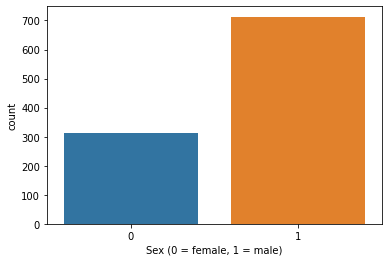

In [5]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


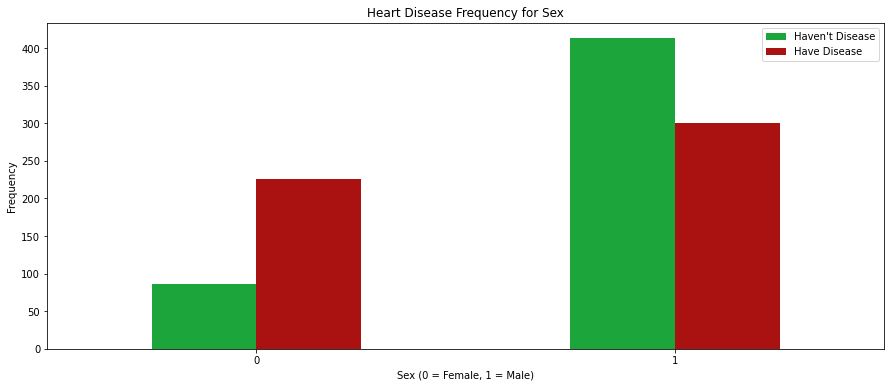

In [7]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

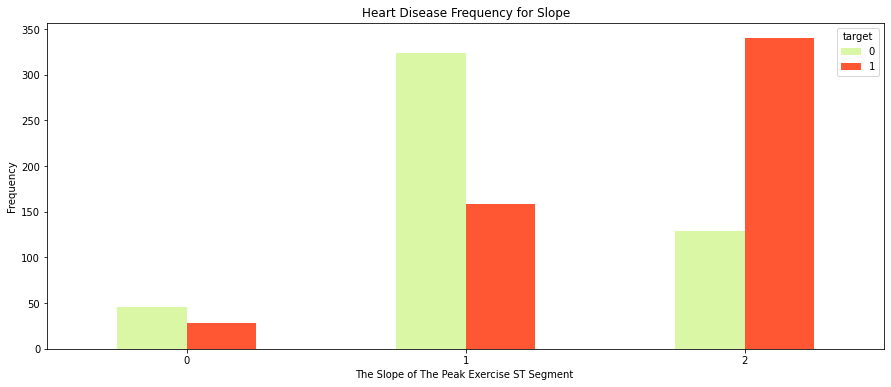

In [8]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

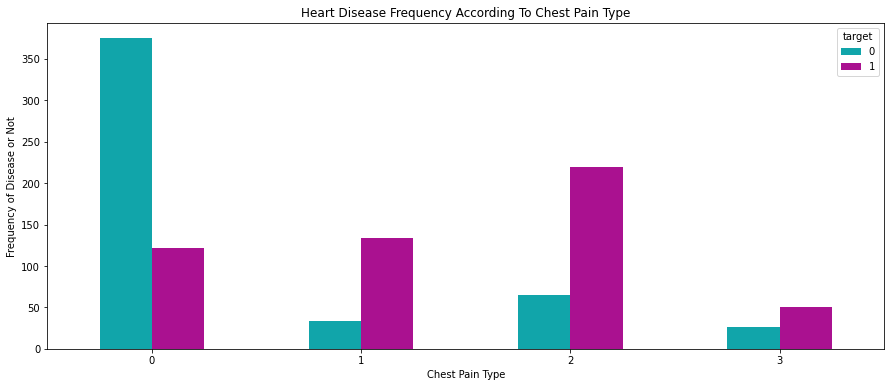

In [9]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [10]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [11]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Train Models
- [X] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [X] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [X] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


models = (
    (MLogisticRegrestion,{'lr':[0.05, 0.01, 0.001], 'epochs': [100, 1000, 5000]}),
    (MKnn, {'weights' : ['uniform', 'distance'], 'k':[5, 50]}),
    (LogisticRegression, {'max_iter': [100, 1000], 'C': [1, 0.5]}),
    (KNeighborsClassifier, {'n_neighbors': [5, 50]}), 
    (SVC, {'C':[1, 0.5]}),
    (GaussianNB, {}),
    (DecisionTreeClassifier, {'splitter': ["best", "random"]})
)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
params = []
for model in models:
    sh = HalvingGridSearchCV(model[0](), model[1], cv=5, scoring='f1',
                             factor=2, min_resources=20).fit(X_train_scaled, y_train)
    params.append(sh.best_estimator_)



In [15]:
from sklearn.metrics import f1_score
ans = []
for model in params:
    ans.append(model.predict(X_test_scaled))
    print(str(model.__class__.__name__))
    print(f1_score(ans[-1], y_test))
    print('--------------------------')


MLogisticRegrestion
0.8167202572347267
--------------------------
MKnn
0.8441558441558441
--------------------------
LogisticRegression
0.8115015974440895
--------------------------
KNeighborsClassifier
0.8167202572347267
--------------------------
SVC
0.8967741935483872
--------------------------
GaussianNB
0.7371134020618556
--------------------------
DecisionTreeClassifier
0.9898305084745762
--------------------------


лучший f1 score показала модель DecisionTreeClassifier
мои модели показали более хороший результат, чем аналогичные модели из sklearn это связано с более хорошим подбором гиперпараметров для моих моделей 

In [16]:
params

[MLogisticRegrestion(epochs=1000, lr=0.05),
 MKnn(),
 LogisticRegression(C=0.5, max_iter=1000),
 KNeighborsClassifier(n_neighbors=50),
 SVC(C=1),
 GaussianNB(),
 DecisionTreeClassifier(splitter='random')]

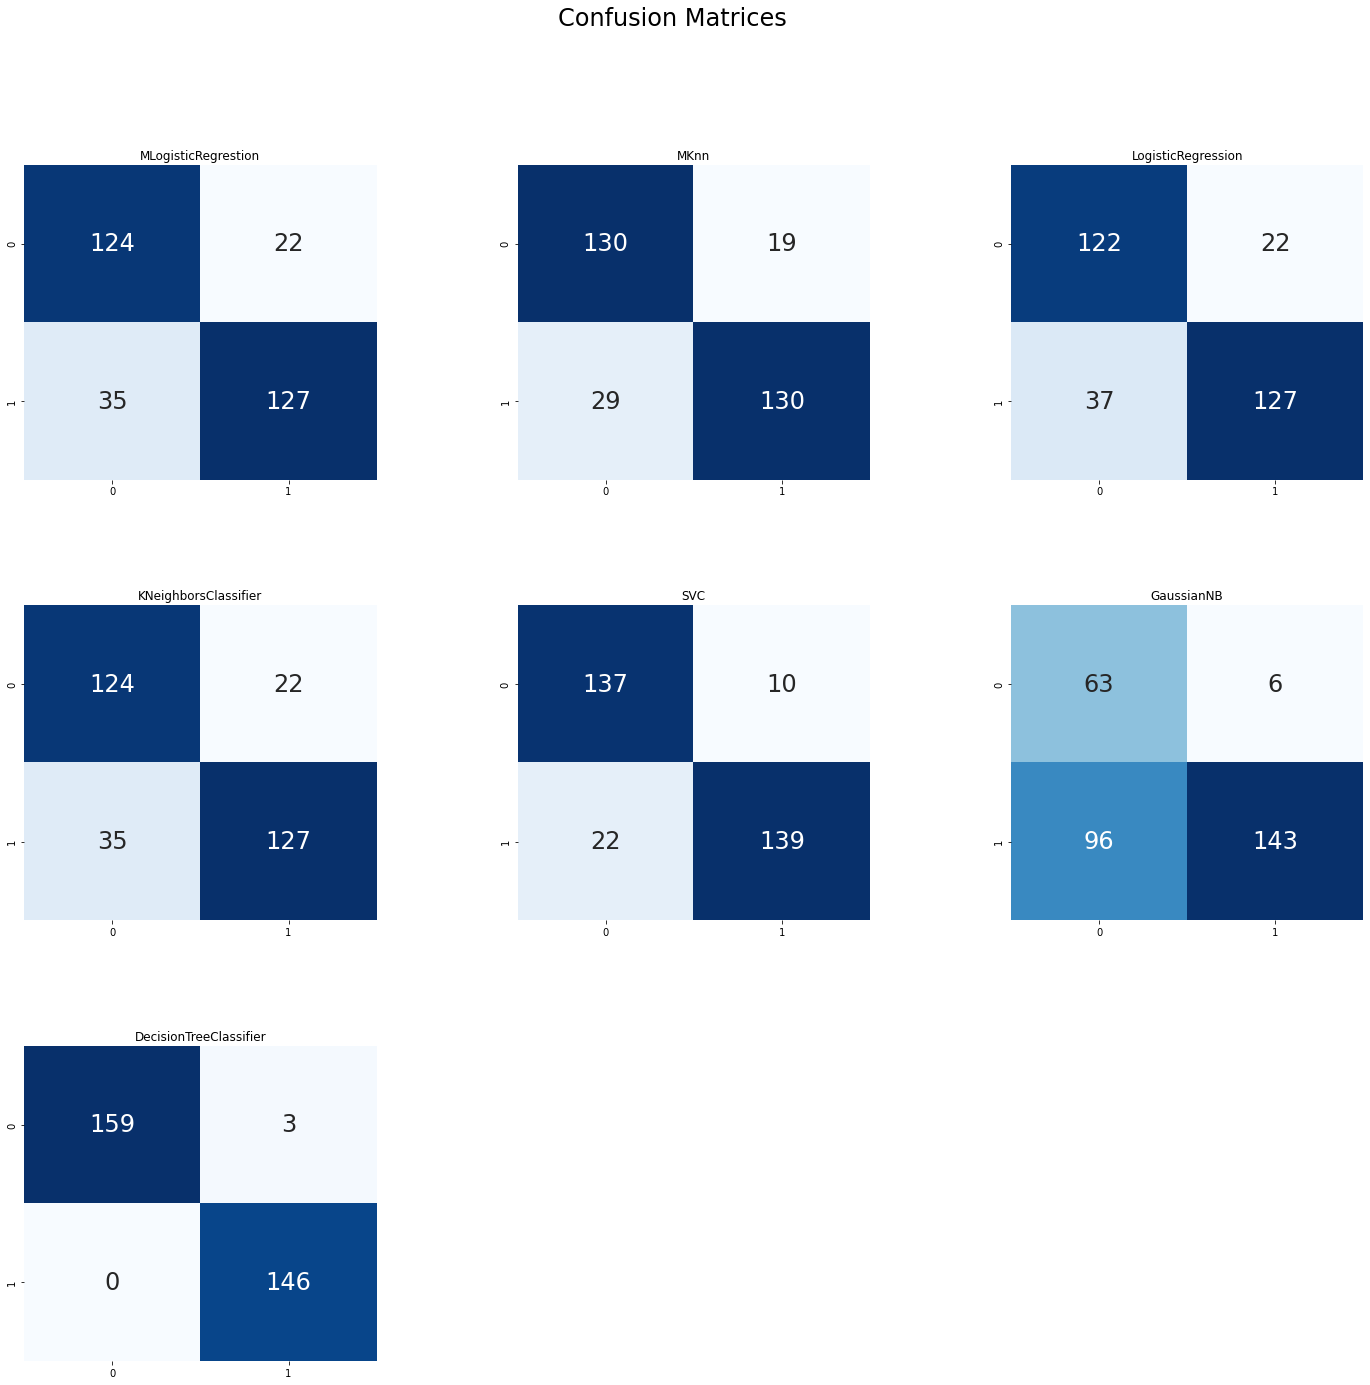

In [17]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(24, 22))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

n = 1
for m, i in zip(params, ans):
    plt.subplot(3,3,n)
    plt.title(str(m.__class__.__name__))
    sns.heatmap(confusion_matrix(i, y_test),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
    n+=1

## My Dataset
(**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

Датасет: https://www.kaggle.com/competitions/titanic


In [41]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# с самого начала можно заметить три столбца, которые нам не пригодятся PassengerId, Name и Ticket. Удалим их
# так же видно что очень мало иноформации о кабине, удалим и это поле
df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


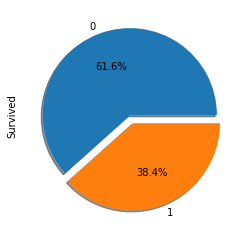

In [44]:
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
#большенство не выжало( 

In [47]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient()
# самая большая выживаемость у девушек 1 класса

In [49]:
df['Age'].mean()

29.69911764705882

In [51]:
df.loc[df['Pclass'] == 1, 'Age'].mean()

38.233440860215055

In [52]:
df.loc[df['Pclass'] == 2, 'Age'].mean()

29.87763005780347

In [53]:
df.loc[df['Pclass'] == 3, 'Age'].mean()
# пассажири первого класса старше 
# заменем пустые значения в возрастах средним их класса

25.14061971830986

In [54]:
df.loc[(df.Age.isnull())&(df.Pclass==1),'Age']=38
df.loc[(df.Age.isnull())&(df.Pclass==2),'Age']=29
df.loc[(df.Age.isnull())&(df.Pclass==3),'Age']=25

In [55]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [58]:
# 2 пустых значения просто уберем
df = df.dropna()

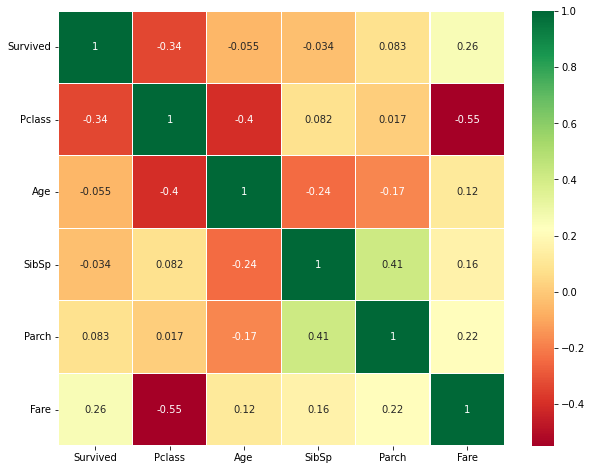

In [59]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
# нет сильной свзяли между фичами, поэтому будем использовать все из них

In [60]:
# заменим значения для пола и места отправления
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


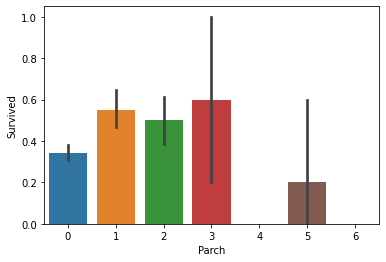

In [63]:
sns.barplot('Parch','Survived',data=df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


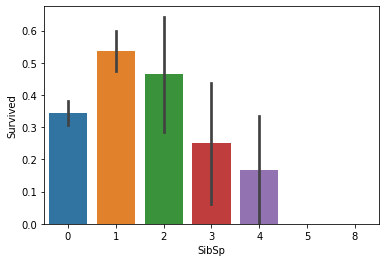

In [66]:
sns.barplot('SibSp','Survived',data=df)

In [67]:
# если путешествовать в одиночку вероятность выжать меньше чем с родственником, однако если семья слишком большая, выживаемость падает
df['Family'] = df['Parch']+df['SibSp']
df['Alone']=0
df.loc[df.Family==0,'Alone']=1

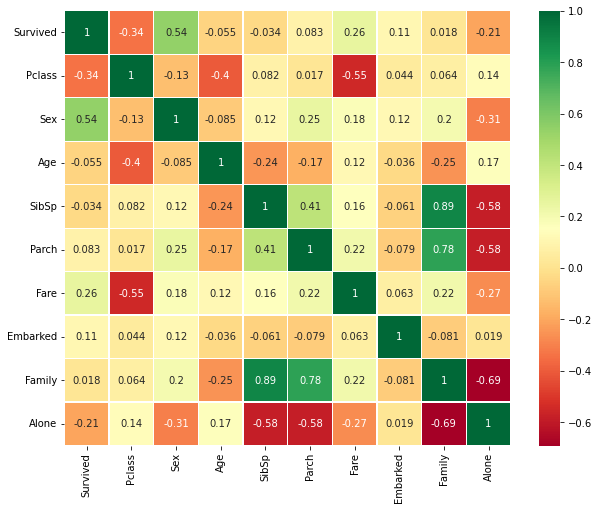

In [68]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Обучение моделей на моих данных

In [69]:
y = df['Survived']
X = df.drop(columns=['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
models = (
    (MLogisticRegrestion,{'lr':[0.05, 0.01, 0.001], 'epochs': [100, 1000, 5000]}),
    (MKnn, {'weights' : ['uniform', 'distance'], 'k':[5, 50]}),
    (LogisticRegression, {'max_iter': [100, 1000], 'C': [1, 0.5]}),
    (KNeighborsClassifier, {'n_neighbors': [5, 50]}), 
    (SVC, {'C':[1, 0.5]}),
    (GaussianNB, {}),
    (DecisionTreeClassifier, {'splitter': ["best", "random"]})
)

In [ ]:
params = []
for model in models:
    sh = HalvingGridSearchCV(model[0](), model[1], cv=5, scoring='f1',
                             factor=2, min_resources=20).fit(X_train_scaled, y_train)
    params.append(sh.best_estimator_)

In [72]:
ans = []
for model in params:
    ans.append(model.predict(X_test_scaled))
    print(str(model.__class__.__name__))
    print(f1_score(ans[-1], y_test))
    print('--------------------------')

MLogisticRegrestion
0.763819095477387
--------------------------
MKnn
0.7236180904522613
--------------------------
LogisticRegression
0.7448979591836735
--------------------------
KNeighborsClassifier
0.6885245901639344
--------------------------
SVC
0.7368421052631577
--------------------------
GaussianNB
0.729064039408867
--------------------------
DecisionTreeClassifier
0.6634615384615383
--------------------------


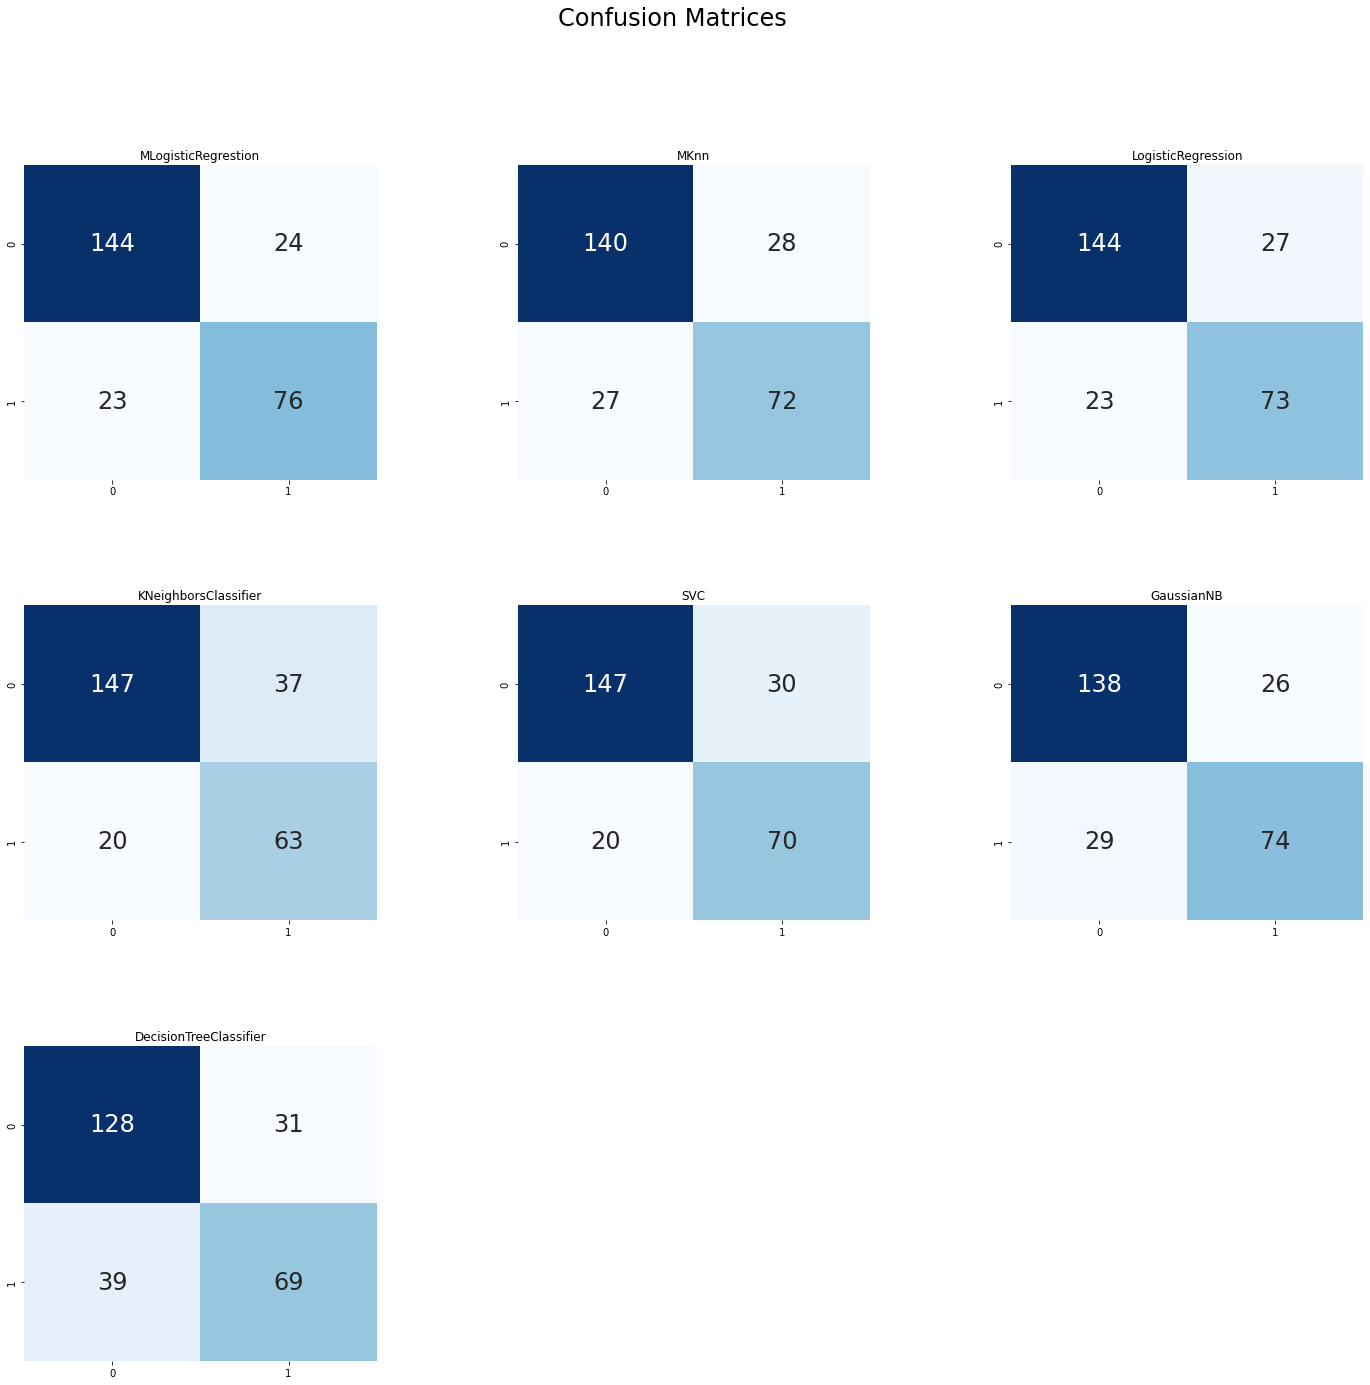

In [73]:
plt.figure(figsize=(24, 22))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

n = 1
for m, i in zip(params, ans):
    plt.subplot(3,3,n)
    plt.title(str(m.__class__.__name__))
    sns.heatmap(confusion_matrix(i, y_test),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
    n+=1

наилучший результат показала моя логистическая регрессия:)